# Classifier

Classification vs. Detection vs. Segmentation
<img src="https://appsilondatascience.com/assets/uploads/2018/08/types.png" height="400" />
Figure 1. Computer vision tasks (from https://www.kdnuggets.com/2018/09/object-detection-image-classification-yolo.html)

## Topology parts

Convolution: 

<img src="https://i.imgur.com/TqTJCrz.png" height="400" />
Figure x. Convolution process


The input of a convolution layer could be a image (if it is in the first layer), and the output is know as feature map.

<img src="https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/keras-conv2d/keras_conv2d_padding.gif" height="400" />
Figure x. Convolution process (from https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/)

<img src="https://miro.medium.com/max/390/1*V4uobVv91cccRy9LtGYkKQ.gif" height="400" width="600" />
Figure x. Convolution process (from https://medium.com/data-science-group-iitr/building-a-convolutional-neural-network-in-python-with-tensorflow-d251c3ca8117)




<img src="https://miro.medium.com/max/504/1*C0EwU0aknuliOsGktK6U0g.png" height="400" />
Figure x. Pooling layer (from https://medium.com/data-science-group-iitr/building-a-convolutional-neural-network-in-python-with-tensorflow-d251c3ca8117)

<img src="https://miro.medium.com/max/1191/1*6HyqifN4M_bJ7DTJ0RFRJA.jpeg" height="400" width="600" />
Figure x. Relu activation function (from https://medium.com/data-science-group-iitr/building-a-convolutional-neural-network-in-python-with-tensorflow-d251c3ca8117)









### Import modules

In [1]:
import keras
from keras.applications.mobilenetv2 import MobileNetV2
from keras.preprocessing import image
from keras.applications.mobilenetv2 import preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications.imagenet_utils import decode_predictions
from keras.optimizers import Adam

import numpy as np
import time
import matplotlib.pyplot as plt
import random


Using TensorFlow backend.
/home/feaf-seat-1/.virtualenvs/nesvera_keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/feaf-seat-1/.virtualenvs/nesvera_keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/feaf-seat-1/.virtualenvs/nesvera_keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

### Variables declaration

Variable input_image_size: 
The input of classifier (neural net) is a image (matrix) of size (224, 224, 3)

Variable mobiletnet_alpha:
Alpha: controls the width of the network. 
This is known as the width multiplier in the MobileNetV2 paper.
If alpha < 1.0, proportionally decreases the number of filters in each layer.
If alpha > 1.0, proportionally increases the number of filters in each layer.
If alpha = 1, default number of filters from the paper are used at each layer.

Papers:
MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications (Mobilenet V1)
https://arxiv.org/abs/1704.04861

MobileNetV2: Inverted Residuals and Linear Bottlenecks
http://openaccess.thecvf.com/content_cvpr_2018/html/Sandler_MobileNetV2_Inverted_Residuals_CVPR_2018_paper.html

In [36]:
output_model_path = "/home/feaf-seat-1/Documents/nesvera/lecture/mobilenet_classification_lecture/model"

input_image_size = 224
mobiletnet_alpha = 0.5

batch_size = 32

classes = ['background',
           'chicken',
           'pedestrian',
           'traf_sign_60',
           'traf_sign_free',
           'traf_sign_stop']

# Path for train and validation datasets
dataset_train_path = "/home/feaf-seat-1/Documents/nesvera/lecture/dataset/ready_dataset/train"
dataset_valid_path = "/home/feaf-seat-1/Documents/nesvera/lecture/dataset/ready_dataset/validation"


### Functions declaration

Info about MobileNetV2 function https://keras.io/applications/#mobilenetv2

In [9]:
def build_mobilenet_v2(image_size, alpha, classes):
    
    # how many classes do we have
    num_classes = len(classes)

    # Load moblenetv2 without the class classification layers
    base_model = MobileNetV2(input_shape=(image_size, image_size, 3), 
                        alpha=alpha,  
                        include_top=False, 
                        weights='imagenet', 
                        input_tensor=None, 
                        pooling=None, 
                        classes=1000)

    # freeze layer already trained with imagenet
    #for layer in base_model.layers:
    #    layer.trainable = False

    # Append new class classificaiton layers
    # add a global spatial average pooling layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    # let's add a fully-connected layer
    x = Dense(1024, activation='relu')(x)
    
    # and a logistic layer -- let's say we have 200 classes
    predictions = Dense(num_classes, activation='softmax')(x)
    
    # this is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)
    
    return model
    
def import_model():
    pass

def load_dataset():
    pass

def plot_images(images, fig_size=(12,6), rows=1, interp=False, titles=None, rescaled=False):
    
    if rescaled == True:
        images = images * 255
    
    if type(images[0]) is np.ndarray:
        images = np.array(images).astype(np.uint8)
        if images.shape[-1] != 3:
            images = images.transpose((0, 2, 3, 1))
        
    fig = plt.figure(figsize=fig_size)
    cols = len(images)//rows if len(images)%2 == 0 else len(images)//rows + 1
    
    for ind, image in enumerate(images):
        sub_plot = fig.add_subplot(rows, cols, ind+1)
        sub_plot.axis('Off')
        
        if titles is not None:
            sub_plot.set_title(titles[ind], fontsize=16)
            
        plt.imshow(image, interpolation=None if interp else 'none')
    
def plot_filters(images, fig_size=(12,6), rows=1, interp=False, titles=None):
    
    #if type(images[0]) is np.ndarray:
    #    images = np.array(images).astype(np.uint8)
    #    if images.shape[-1] != 3:
    #        images = images.transpose((0, 2, 3, 1))
        
    v_min = np.min(images)
    v_max = np.max(images)
    
    fig = plt.figure(figsize=fig_size)
    cols = len(images)//rows if len(images)%2 == 0 else len(images)//rows + 1
    
    for ind, image in enumerate(images):
        sub_plot = fig.add_subplot(rows, cols, ind+1)
        sub_plot.axis('Off')
        
        if titles is not None:
            sub_plot.set_title(titles[ind], fontsize=16)
        plt.imshow(image, interpolation=None if interp else 'none', cmap='gray', vmin=v_min, vmax=v_max)
        
        for i in range(3):
            for j in range(3):
                sub_plot.text(j, i, round(image[i, j],2), ha="center", va="center", color="w")
        
    fig.savefig('/home/nesvera/Documents/ostfalia/driverless_lecture/lecture/to1.png') 

### Load model

In [4]:
# Build model based on mobilenet v2
model = build_mobilenet_v2(input_image_size, mobiletnet_alpha, classes=classes)

# Show the model
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 16) 432         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 16) 64          Conv1[0][0]                      
_____________________________________

### Load datasets

Keras has some functions augment the dataset automaticaly. In this lecture it was not used to demonstrate what could be done to increase the dataset, and this process works.

Look: ImageDataGenerator in https://keras.io/preprocessing/image/

In [6]:
datagen = image.ImageDataGenerator(rescale=1./255)

#train_batches = ImageDataGenerator().flow_from_directory(dataset_train_path, target_size=(224,224), classes=classes, batch_size=batch_size_train
train_batches = datagen.flow_from_directory(dataset_train_path, 
                                                               target_size=(224,224),
                                                               batch_size=batch_size,
                                                               classes=classes)

validation_batches = datagen.flow_from_directory(dataset_train_path, 
                                                                    target_size=(224,224), 
                                                                    batch_size=batch_size,
                                                                    classes=classes)

step_size = train_batches.n//train_batches.batch_size
print(step_size)

print("Batch size: " + str(batch_size))
print("Step size: " + str(step_size))

print("\nClasses: ")
for i, class_ in enumerate(classes):
    print("[" + str(i) + "] - " + class_ )

Found 9295 images belonging to 6 classes.
Found 9295 images belonging to 6 classes.
290
Batch size: 32
Step size: 290

Classes: 
[0] - background
[1] - chicken
[2] - pedestrian
[3] - traf_sign_60
[4] - traf_sign_free
[5] - traf_sign_stop


### Dataset demonstration

Present some of the images that are inside the batches

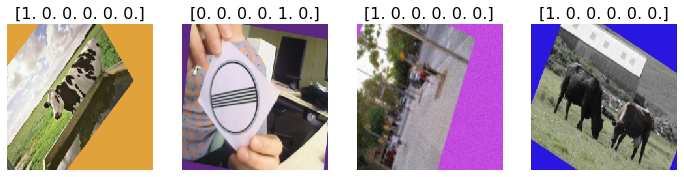

In [10]:
images, labels = next(train_batches)
plot_images(images[0:4], rows=1, interp=False, titles=labels, rescaled=True)

### Train configuration

Optimizer:

Losses:

Metrics:


In [79]:
training_history = None
training_history_list = list()

In [26]:
optimizer = Adam(lr=.0000001)
loss = 'categorical_crossentropy'
metrics = ['accuracy']

model.compile(optimizer, loss=loss, metrics=metrics)

In [81]:
epochs = 2

# The output of the fit_generator is a record of training loss values and metrics values at 
# successive epochs, as well as validation loss values and metrics values
current_history = model.fit_generator(train_batches, steps_per_epoch=step_size,
                                       validation_data=validation_batches, validation_steps=step_size,
                                       epochs=epochs,
                                       verbose=1)                 

training_history_list.append(current_history)

# If the process of training is repeated, this will concatened the records of last trainings
if training_history is None:
    training_history = current_history
    
else:
    for key, attribute_list in current_history.history.items():
        print(key)
        print(len(attribute_list))
    
        training_history.history[key] += attribute_list[:]

print(training_history.history['acc'])

Epoch 1/2
290/290 [==============================] - 92s 317ms/step - loss: 0.0010 - acc: 0.9996 - val_loss: 9.8156e-04 - val_acc: 0.9995
Epoch 2/2
290/290 [==============================] - 91s 315ms/step - loss: 0.0011 - acc: 0.9996 - val_loss: 9.5327e-04 - val_acc: 0.9997
val_loss
2
val_acc
2
loss
2
acc
2
[0.999460218071899, 0.9993522616862788, 0.9995681744575191, 0.9995681744575191]


### Test

Prediction result: 
Label: background
Accuracy: 100.0


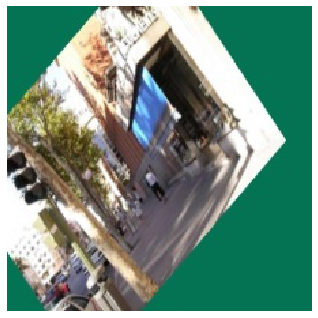

In [33]:
test_image = random.choice(images)
test_image = np.reshape(test_image, (-1, test_image.shape[0], test_image.shape[1], test_image.shape[2]))

predictions = model.predict(test_image)

pred_max_value = np.max(predictions)
pred_max_index = np.argmax(predictions)

plot_images(test_image, rescaled=True)
print('Prediction result: ')
print('Label: ' + str(classes[pred_max_index]))
print('Accuracy: ' + str(pred_max_value*100))

### Save model and weights

In [38]:
output_model_h5 = output_model_path + "/mobilenet_0-5_40e_22-08-19_15-25.h5"
print(output_model_h5)
model.save(output_model_h5)

### Analyse network

In [112]:
'''
for i, layer in enumerate(model.layers):
    #weights = layer.get_weights() # list of numpy arrays
    weights = np.array(layer.get_weights())
    print(i, weights.shape)
    input()
'''

weights = np.array(model.layers[40].get_weights())
print(weights.shape)

(1, 3, 3, 96, 1)


In [ ]:
filters =  np.reshape(weights[0], (16, 3, 3, 3))
print(filters.shape)

-0.27964717 0.41337186


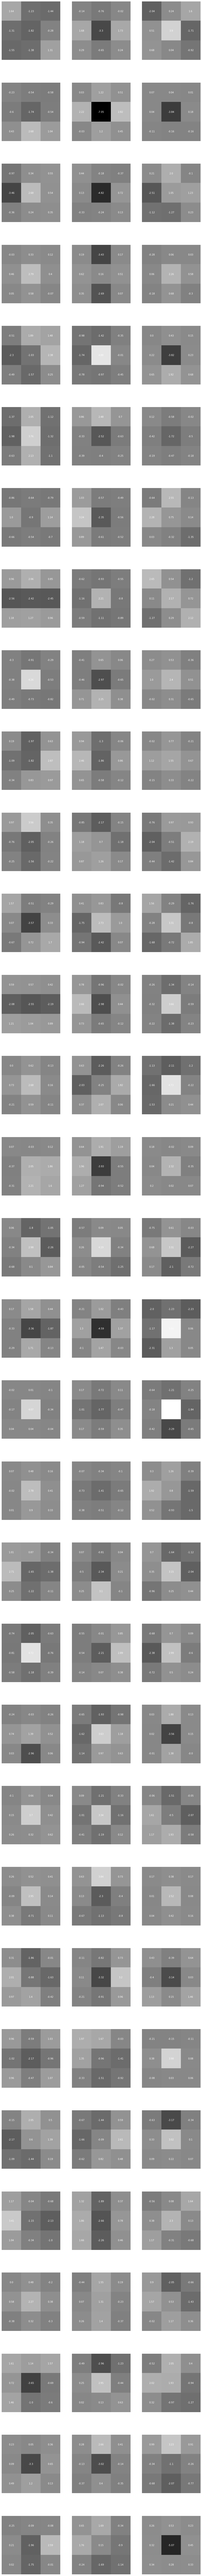

In [150]:
to_print = np.zeros((96,3,3))
for i in range(96):
        to_print[i] = weights[0,:,:,i,0]

plot_filters(to_print, rows=32, fig_size=(15,200))

